In [1]:
import os
import sys
import cPickle
import datetime
import matplotlib
import numpy as np
import pandas as pd
import networkx as nx

from scipy.stats import binom
from matplotlib import pyplot as plt

matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True 


sys.path.append("../../../")
%matplotlib inline

In [2]:
from graph_dynamics.networks.datatypes import CryptocurrencyGraphs
from graph_dynamics.dynamics import FromFilesDynamics

In [3]:
cryptocurrency_networks = "/home/cesar/Desktop/Doctorado/Projects/Networks/Cryptocurrencies/Results/cryptocurrencies_graphdynamics/"

In [4]:
identifier_string = "Crash Detections (Data up to 24/06/17)"
graph_files_folder = "/home/cesar/Desktop/Doctorado/Projects/Networks/Cryptocurrencies/Results/cryptocurrencies_graphdynamics/"
data_file_string = 'cryptocurrencies_graphdynamics_snapshot_{0}_data.cpickle3'
graph_file_string = 'cryptocurrencies_graphdynamics_snapshot_{0}_graph.txt'
time_index = 20

In [5]:
graph_file_string.split("_")

['cryptocurrencies', 'graphdynamics', 'snapshot', '{0}', 'graph.txt']

In [6]:
CryptocurrencyEcosystem = CryptocurrencyGraphs(identifier_string,
                                               graph_files_folder,
                                               graph_file_string,
                                               data_file_string,
                                               23)

In [7]:
EcosystemDynamics = FromFilesDynamics.CryptoCurrencyEcosystemDynamics(identifier_string,
                                                                      graph_files_folder,
                                                                      graph_file_string,
                                                                      data_file_string)

In [10]:
crash_dict = CryptocurrencyEcosystem.ecosystem_crash()

In [11]:
arrivals = crash_dict.values()

In [14]:
from ppp.splines import InoueBspline
from ppp.interpolation import PoissonProcess

In [21]:
time_delta = datetime.datetime(2017, 6, 1) - np.asarray(arrivals)

In [24]:
date0 = min(arrivals)
arrivals_points = [(a-date0).total_seconds()/(24.*3600) for a in arrivals]

In [29]:
splines = InoueBspline(M = 20, X=np.asarray(arrivals_points))
model = PoissonProcess(splines)

In [30]:
model.fit()

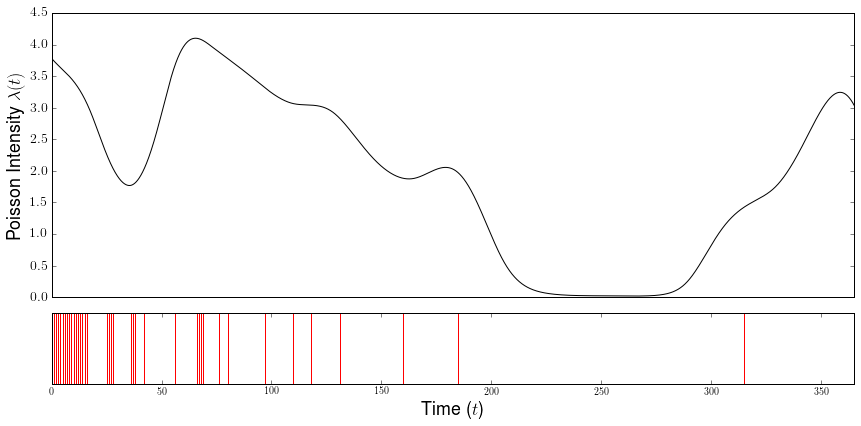

In [31]:
model.plot()